In [1]:
# importar libreria pandas
import pandas as pd

In [2]:
dict_data = {'Name': ["John", "Anna", "Lunna", "Christian"], 
             'Location': ["Lima", "Chiclayo", "Arequipa", "Lambayeque"]}

# Creamos dataframe con un diccionario
df = pd.DataFrame(data=dict_data)


In [3]:
df

,Name,Location
0,John,Lima
1,Anna,Chiclayo
2,Lunna,Arequipa
3,Christian,Lambayeque


In [4]:
# Tipo de datos
df.dtypes

Name        object
Location    object
dtype: object

In [5]:
# Agreagamos una columna Age
dict_data = {
    'Name': ["John", "Anna", "Lunna", "Christian"], 
    'Location': ["Lima", "Chiclayo", "Arequipa", "Lambayeque"],
    "Age": [20, 30, 18, 25]
             
             }
df = pd.DataFrame(data=dict_data)

df

,Name,Location,Age
0,John,Lima,20
1,Anna,Chiclayo,30
2,Lunna,Arequipa,18
3,Christian,Lambayeque,25


In [6]:
df.dtypes

Name        object
Location    object
Age          int64
dtype: object

In [7]:
# Primero n filas
df.head(2)

,Name,Location,Age
0,John,Lima,20
1,Anna,Chiclayo,30


In [8]:
# Ultimo n datos
df.tail(3)

,Name,Location,Age
1,Anna,Chiclayo,30
2,Lunna,Arequipa,18
3,Christian,Lambayeque,25


In [9]:
# Mostramos filas requeridas: df[fila, columnas]
df.loc[1:2,['Name', 'Age']]

,Name,Age
1,Anna,30
2,Lunna,18


In [10]:
# Filtrar de acuerdo al nombre de una columna
# df[df.Age > 18 ]
df[df['Age'] > 18] 

,Name,Location,Age
0,John,Lima,20
1,Anna,Chiclayo,30
3,Christian,Lambayeque,25


In [11]:
# Filtracion con dicional: And(&), OR(|)
df[(df['Age'] > 18) & (df['Location']=='Chiclayo')] 

,Name,Location,Age
1,Anna,Chiclayo,30


In [12]:
# Operaciones: suma, promedio, etc
df['Age'].sum()

93

In [13]:
# Operaciones basicas: sum, restar, dividir, multiplicar
df['divide_age'] = df['Age']/2
df['double_age'] = df['Age']*2
df

,Name,Location,Age,divide_age,double_age
0,John,Lima,20,10.0,40
1,Anna,Chiclayo,30,15.0,60
2,Lunna,Arequipa,18,9.0,36
3,Christian,Lambayeque,25,12.5,50


In [14]:
# Agregamos caracteres a la localidad
dict_data = {
    'Name': ["John", "Anna", "Lunna", "Christian", "Leonel"], 
    'Location': ["L-ima", "Chi-clayo", "Arequipa", "Lambayeque", "Lambayeque"],
    "Age": [20, 18, 18, 25, 25],
    "Sex": ["M", "F", "F", "M", "M"],
             
             }
df = pd.DataFrame(data=dict_data)
df

,Name,Location,Age,Sex
0,John,L-ima,20,M
1,Anna,Chi-clayo,18,F
2,Lunna,Arequipa,18,F
3,Christian,Lambayeque,25,M
4,Leonel,Lambayeque,25,M


In [15]:
# Limpiar valores
df['Location'] = df['Location'].str.replace('-', '')
df


,Name,Location,Age,Sex
0,John,Lima,20,M
1,Anna,Chiclayo,18,F
2,Lunna,Arequipa,18,F
3,Christian,Lambayeque,25,M
4,Leonel,Lambayeque,25,M


,Name,Location,Age,Sex
0,John,Lima,20,M
1,Anna,Chiclayo,18,F
2,Lunna,Arequipa,18,F
3,Christian,Lambayeque,25,M
4,Leonel,Lambayeque,25,M


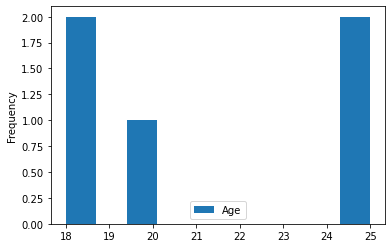

In [16]:
# Graficar dataframe 
# df = df.reindex(['Location', 'Age'], axis=1)
df.plot(kind='hist', x='Location', y='Age')

df

In [17]:
# Leer datos en diferentes formatos de archivos: to_csv, to_excel, to_parquet
df
df.to_csv("out/save_student.csv", index=False, encoding='utf-8')


In [18]:
df_csv = pd.read_csv("out/student.csv")
df_csv

,Name,Location,Age,Sex,Level
0,John,Lima,20,M,Junior
1,Anna,Chiclayo,18,F,Semi-senior
2,Lunna,Arequipa,18,F,Senior
3,Christian,Lambayeque,25,M,Semi-Junior
4,Leonel,Lambayeque,25,M,Student


In [19]:
# Agregar una columna
df_csv['university'] = 'UNPRG'
df_csv

,Name,Location,Age,Sex,Level,university
0,John,Lima,20,M,Junior,UNPRG
1,Anna,Chiclayo,18,F,Semi-senior,UNPRG
2,Lunna,Arequipa,18,F,Senior,UNPRG
3,Christian,Lambayeque,25,M,Semi-Junior,UNPRG
4,Leonel,Lambayeque,25,M,Student,UNPRG


In [20]:
# apply(function, column): axis=1: column, axis=0: row(defect)
# applymap: Dataframe
# map: series
# apply: Dataframe and series

def student_search(level):
  if 'senior' in level.strip().lower():
      return 'Apto'
  return 'No Apto'
df_csv.columns
df_csv['search'] = df_csv['Level'].apply(student_search)
df_csv

,Name,Location,Age,Sex,Level,university,search
0,John,Lima,20,M,Junior,UNPRG,No Apto
1,Anna,Chiclayo,18,F,Semi-senior,UNPRG,Apto
2,Lunna,Arequipa,18,F,Senior,UNPRG,Apto
3,Christian,Lambayeque,25,M,Semi-Junior,UNPRG,No Apto
4,Leonel,Lambayeque,25,M,Student,UNPRG,No Apto
